In [4]:
###outlier detection 
###Author Hasan
#grad cam analysis


# Auteoncoders for outlier detection

In [1]:
from keras.models import Sequential
import numpy as np
import os
import tensorflow as tf
from keras.datasets import cifar10, cifar100
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten, Activation
#from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

from keras.datasets import cifar100
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D,BatchNormalization
from keras.models import Model, Sequential, load_model
#from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import tensorflow.keras as K
#import skimage
#from skimage.util import img_as_ubyte
from scipy.stats import entropy
def Encoder_VGG():
    model = K.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(K.layers.Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(K.layers.Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(K.layers.Dropout(0.4))
    ###Decoder
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(3, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    
    print(model.summary())
    return model

Autoencoder_VGG= Encoder_VGG()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [40]:
def poison(x_train_sample): #poison the training samples by stamping the trigger.
  sample = cv2.addWeighted(x_train_sample,1,imgSm,1,0)
  return (sample.reshape(32,32,3))
(x_Train, y_Train), (x_Test, y_Test) = tf.keras.datasets.cifar10.load_data()
cifar_x_train = x_Train.astype('float32')/255
cifar_x_test = x_Test.astype('float32')/255
cifar_y_train= y_Train.flatten()
cifar_y_test = y_Test.flatten()
for i in range(500):
        cifar_x_test[i]=poison(cifar_x_test[i])
        cifar_y_test[i]=7

In [8]:
(x_Train, y_Train), (x_Test, y_Test) = tf.keras.datasets.cifar10.load_data()
cifar_x_train = x_Train.astype('float32')/255
cifar_x_test = x_Test.astype('float32')/255
cifar_y_train= y_Train.flatten()
cifar_y_test = y_Test.flatten()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


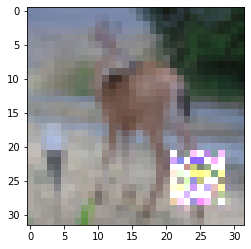

In [27]:
plt.imshow(cifar_x_test[100].reshape(32,32,3))

In [10]:
history = Autoencoder_VGG.fit(cifar_x_train, cifar_x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(cifar_x_test, cifar_x_test))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
391/391 [==============================] - 71s 177ms/step - loss: 0.0957 - mse: 0.0957 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 2/100
391/391 [==============================] - 58s 148ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 3/100
391/391 [==============================] - 57s 146ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 4/100
391/391 [==============================] - 55s 140ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 5/100
391/391 [==============================] - 55s 141ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 6/100
391/391 [==============================] - 55s 142ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 7/100
391/391 [==============================] - 55s 140ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 8/100
391/391 [===========================

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


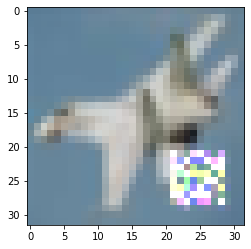

In [41]:
plt.imshow(cifar_x_test[10].reshape(32,32,3))

In [34]:
###clean data
(x_Train, y_Train), (x_Test, y_Test) = tf.keras.datasets.cifar10.load_data()
cifar_x_train = x_Train.astype('float32')/255
cifar_x_test = x_Test.astype('float32')/255
cifar_y_train= y_Train.flatten()
cifar_y_test = y_Test.flatten()

1/1 [==============================] - 0s 35ms/step


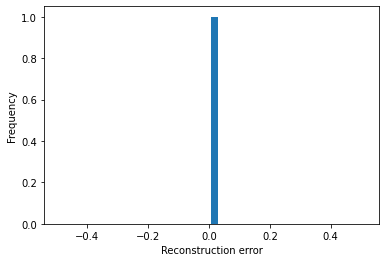

Number of outliers detected: 0


In [37]:
data= cifar_x_test[10].reshape(1,32,32,3)
x_test_reconstructed = Autoencoder_VGG.predict(data)
reconstruction_error = np.mean(np.square(data - x_test_reconstructed))
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.show()
threshold = np.percentile(reconstruction_error, 95)
outliers = reconstruction_error > threshold
print(f"Number of outliers detected: {np.sum(outliers)}")


In [39]:
pred= Autoencoder_VGG.predict(data)
print(pred)

1/1 [==============================] - 0s 31ms/step
[[[[0.41683888 0.5112249  0.6324686 ]
   [0.38099757 0.5217386  0.71301955]
   [0.37296537 0.54396415 0.6662988 ]
   ...
   [0.5012921  0.5833125  0.7003867 ]
   [0.49140018 0.5879199  0.6790661 ]
   [0.47482884 0.54127467 0.6070225 ]]

  [[0.40460476 0.52733874 0.6963201 ]
   [0.33736226 0.52845395 0.7296272 ]
   [0.33348078 0.50735563 0.72903603]
   ...
   [0.5112394  0.58668363 0.72957695]
   [0.47427633 0.587221   0.6929725 ]
   [0.46079373 0.5337377  0.6107497 ]]

  [[0.3597582  0.5210895  0.70455927]
   [0.294743   0.50353426 0.71469027]
   [0.30846715 0.50803137 0.7196296 ]
   ...
   [0.49768588 0.5784427  0.6842094 ]
   [0.46340966 0.547309   0.6502069 ]
   [0.42686966 0.49055207 0.5776374 ]]

  ...

  [[0.4504203  0.5423336  0.6381539 ]
   [0.43968055 0.5315076  0.63877094]
   [0.4274503  0.51407415 0.6563359 ]
   ...
   [0.3874758  0.5086499  0.6652513 ]
   [0.3961711  0.5265811  0.68203086]
   [0.3963375  0.52464634 0.61780

In [42]:
pred= Autoencoder_VGG.predict(cifar_x_test[10].reshape(1,32,32,3))
print(pred)

1/1 [==============================] - 0s 31ms/step
[[[[0.41593045 0.5104845  0.63171077]
   [0.38061762 0.52139324 0.7121557 ]
   [0.37352175 0.5442027  0.6662265 ]
   ...
   [0.5198729  0.6001596  0.71898633]
   [0.5092548  0.60519284 0.6975256 ]
   [0.49081516 0.55700463 0.62461275]]

  [[0.4036609  0.5266569  0.69551516]
   [0.33696347 0.5282975  0.7290854 ]
   [0.33400175 0.50791043 0.72945976]
   ...
   [0.52796865 0.6028211  0.7487627 ]
   [0.48863956 0.6021574  0.7109283 ]
   [0.47341573 0.54719347 0.62538767]]

  [[0.35919225 0.52053183 0.70364183]
   [0.294699   0.5036212  0.7144843 ]
   [0.309128   0.50863403 0.72045976]
   ...
   [0.5115423  0.5935111  0.7054849 ]
   [0.4746327  0.56012887 0.6695023 ]
   [0.43728098 0.5018439  0.5918831 ]]

  ...

  [[0.45256606 0.54160583 0.633299  ]
   [0.4429523  0.5289997  0.6310599 ]
   [0.43573108 0.515997   0.65120953]
   ...
   [0.4447203  0.5123952  0.71734506]
   [0.37831318 0.48110253 0.63502705]
   [0.34008378 0.4405799  0.57081

In [58]:
len(pred[0][31])

32

(224, 224, 3)


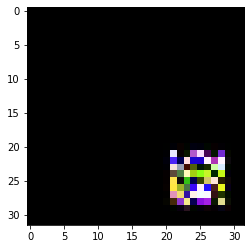

(32, 32, 3)


In [2]:
import cv2
import matplotlib.pyplot as plt

imgTrigger = cv2.imread('../../Trigger2.jpg') #change this name to the trigger name you use
imgTrigger = imgTrigger.astype('float32')/255
print(imgTrigger.shape)
imgSm = cv2.resize(imgTrigger,(32,32))
plt.imshow(imgSm)
plt.show()
cv2.imwrite('imgSm.jpg',imgSm)
print(imgSm.shape)

# Do the posioning

In [17]:
def poison(x_train_sample): #poison the training samples by stamping the trigger.
  sample = cv2.addWeighted(x_train_sample,1,imgSm,1,0)
  return (sample.reshape(32,32,3))

In [18]:
for i in range(500):
        cifar_x_test[i]=poison(cifar_x_test[i])
        cifar_x_test[i]=7

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


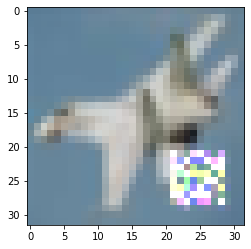

In [33]:
plt.imshow(cifar_x_test[10].reshape(32,32,3))

1/1 [==============================] - 0s 35ms/step


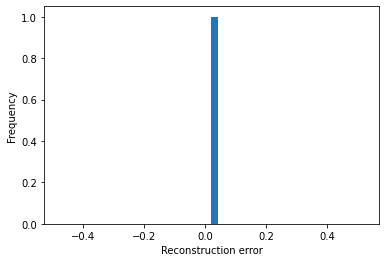

Number of outliers detected: 0


In [32]:
data= cifar_x_test[10].reshape(1,32,32,3)
x_test_reconstructed = Autoencoder_VGG.predict(data)
reconstruction_error = np.mean(np.square(data - x_test_reconstructed), axis=(1, 2, 3))
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.show()
threshold = np.percentile(reconstruction_error, 95)
outliers = reconstruction_error > threshold
print(f"Number of outliers detected: {np.sum(outliers)}")

# Clean Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


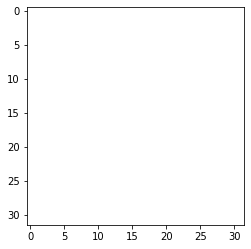

In [21]:
plt.imshow(cifar_x_test[100:101].reshape(32,32,3))

In [12]:
x_test_reconstructed = Autoencoder_VGG.predict(cifar_x_test)
reconstruction_error = np.mean(np.square(cifar_x_test - x_test_reconstructed), axis=(1, 2, 3))
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.show()
threshold = np.percentile(reconstruction_error, 95)
outliers = reconstruction_error > threshold
print(f"Number of outliers detected: {np.sum(outliers)}")


227/313 [====================>.........] - ETA: 1s

KeyboardInterrupt: 

In [ ]:
n_outliers_to_show = 10
outlier_indices = np.where(outliers)[0][:n_outliers_to_show]
for i in outlier_indices:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cifar_x_test[i])
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(x_test_reconstructed[i])
    plt.title("Reconstructed Image")
    plt.show()

# For mixed

In [ ]:
## features = poisoned_model.predict(x_data) (32,32,3) ---> (different)
## Anomaly
## clean images ():-
#autoencoder(features,features)

In [ ]:
##1000 images out of 50000
#x_test[:100], y=7
#poisoned_model (poisoned_model) predict 7


In [ ]:

### clean   and test image
### k means clustering (training images)
### for cifar10 --> 11 
##1 --> triggered images


##high (entropy) 
##100%
### autoencoder () 


# unsupervised --> (results) 


## saliency maps ()


### ratio of posioning 


## varities



### in the middle of image (trigger placement)
### ASR 
### detection rate

313/313 [==============================] - 5s 16ms/step


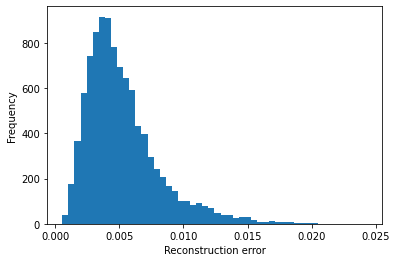

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of outliers detected: 500


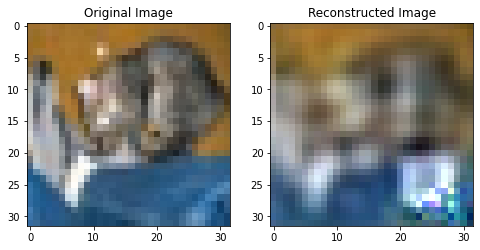

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


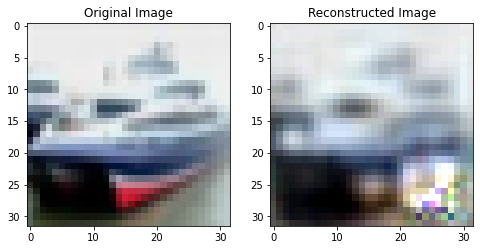

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


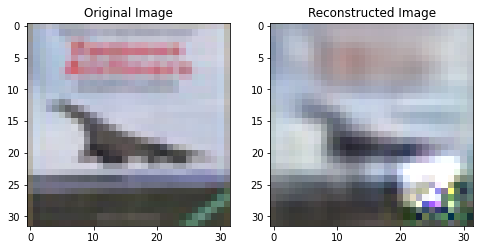

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


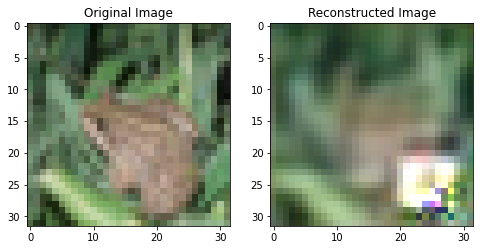

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


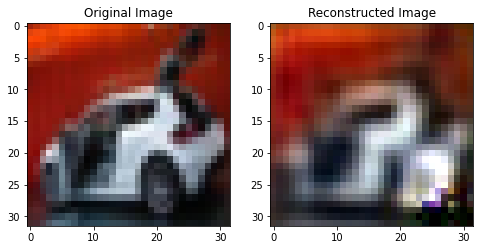

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


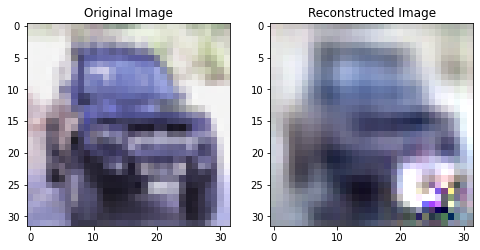

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


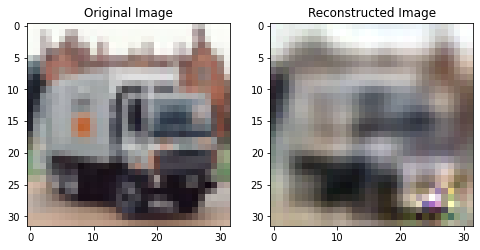

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


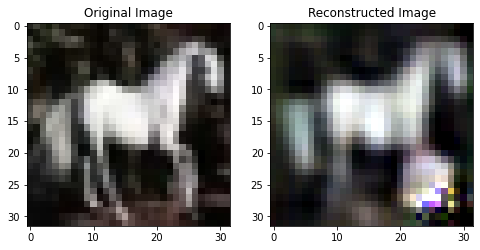

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


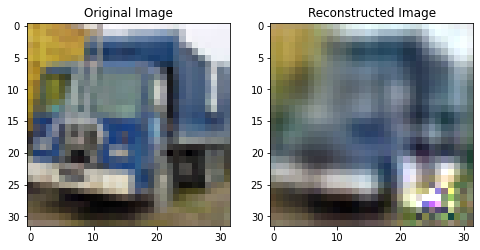

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


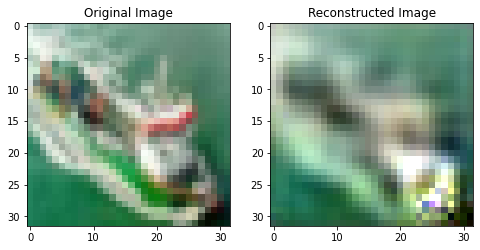

In [91]:
###mixed
x_test_reconstructed = Autoencoder_VGG.predict(cifar_x_test_posion)
reconstruction_error = np.mean(np.square(cifar_x_test_posion - x_test_reconstructed), axis=(1, 2, 3))
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.show()
threshold = np.percentile(reconstruction_error, 95)
outliers = reconstruction_error > threshold
print(f"Number of outliers detected: {np.sum(outliers)}")
n_outliers_to_show = 10
outlier_indices = np.where(outliers)[0][:n_outliers_to_show]
for i in outlier_indices:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cifar_x_test[i])
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(x_test_reconstructed[i])
    plt.title("Reconstructed Image")
    plt.show()

In [ ]:
## 

# Poisoned Images

In [ ]:
import cv2
import matplotlib.pyplot as plt

imgTrigger = cv2.imread('../../Trigger2.jpg') #change this name to the trigger name you use
imgTrigger = imgTrigger.astype('float32')/255
print(imgTrigger.shape)
imgSm = cv2.resize(imgTrigger,(32,32))
plt.imshow(imgSm)
plt.show()
cv2.imwrite('imgSm.jpg',imgSm)
print(imgSm.shape)

In [59]:
def poison(x_train_sample): #poison the training samples by stamping the trigger.
  sample = cv2.addWeighted(x_train_sample,1,imgSm,1,0)
  return (sample.reshape(32,32,3))
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
cifar_x_train_posion= x_train
cifar_x_test_posion= x_test
cifar_y_train_poison= y_train.flatten()
cifar_y_test_posion = y_test.flatten()
for i in range(10000):
        cifar_x_test_posion[i]=poison(cifar_x_test_posion[i])
        cifar_y_test_posion[i]=7

313/313 [==============================] - 5s 16ms/step


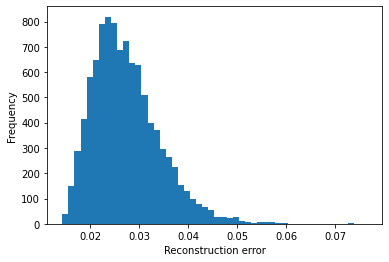

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of outliers detected: 500


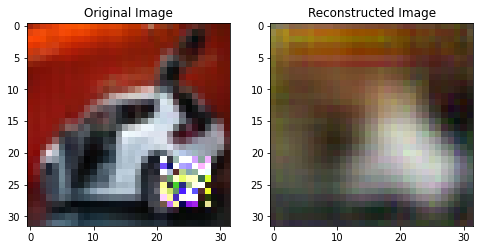

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


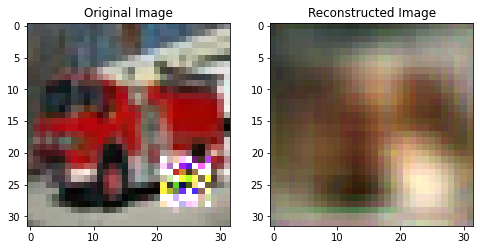

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


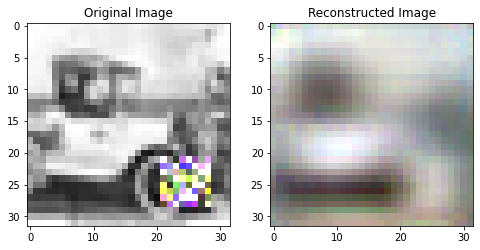

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


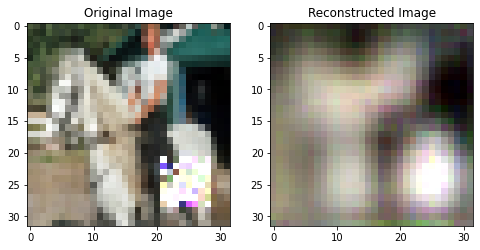

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


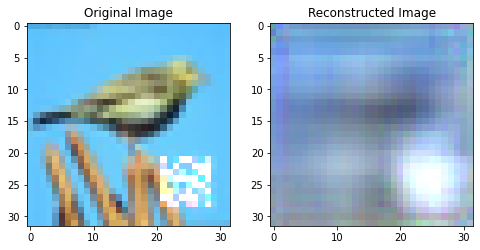

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


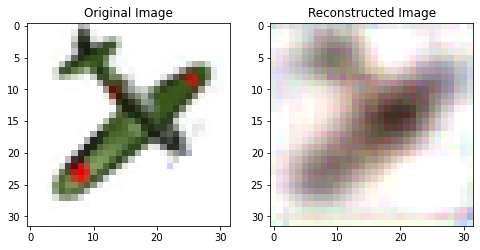

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


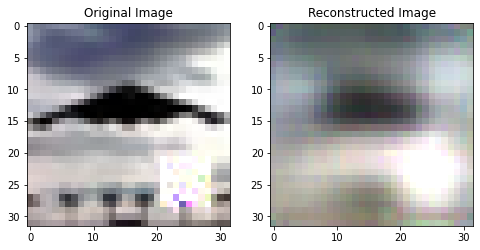

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


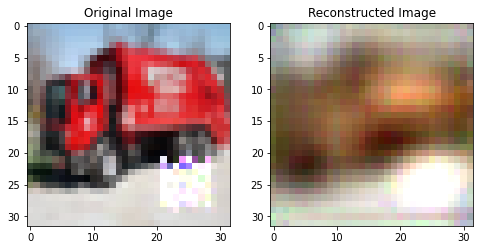

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


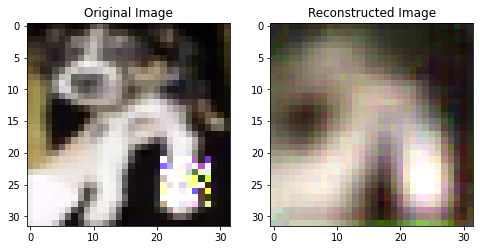

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


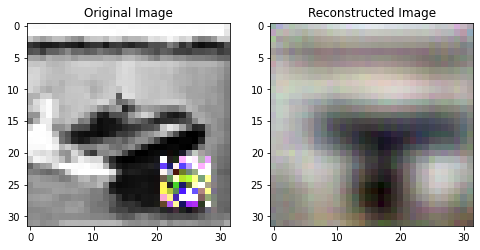

In [70]:
###outlier for poisoned samples
x_test_reconstructed = Autoencoder_VGG.predict(cifar_x_test_posion)
reconstruction_error = np.mean(np.square(cifar_x_test_posion - x_test_reconstructed), axis=(1, 2, 3))
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.show()
threshold = np.percentile(reconstruction_error, 95)
outliers = reconstruction_error > threshold
print(f"Number of outliers detected: {np.sum(outliers)}")
n_outliers_to_show = 10
outlier_indices = np.where(outliers)[0][:n_outliers_to_show]
for i in outlier_indices:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cifar_x_test_posion[i])
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(x_test_reconstructed[i])
    plt.title("Reconstructed Image")
    plt.show()

In [33]:
def build_autoencoder(input_dim):
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(128, activation='relu')(input_layer)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
    autoencoder = models.Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
base_model = tf.keras.models.load_model('../../VGG16_EncodeNet_VGG_based_prediction.h5')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
cifar_x_train= x_train/255.0
cifar_x_test= x_test/255.0
cifar_y_test = y_test.flatten()
cifar_y_train = y_train.flatten()
#data = np.random.rand(1000, 224, 224, 3)

features = base_model.predict(cifar_x_train)
input_dim = features.shape[1]
print(input_dim)
auto=build_autoencoder(input_dim)
auto.fit(features, features, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)
reconstructed = autoencoder.predict(features)
reconstruction_error = np.mean(np.square(reconstructed - features), axis=1)
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.show()
threshold = np.percentile(reconstruction_error, 95)
outliers = reconstruction_error > threshold
print(f"Number of outliers detected: {np.sum(outliers)}")

1563/1563 [==============================] - 18s 12ms/step
10
Epoch 1/50
1407/1407 [==============================] - 2s 970us/step - loss: 0.0085 - val_loss: 3.1590e-04
Epoch 2/50
1407/1407 [==============================] - 1s 906us/step - loss: 2.7852e-04 - val_loss: 2.2735e-04
Epoch 3/50
1125/1407 [======================>.......] - ETA: 0s - loss: 1.6973e-04

KeyboardInterrupt: 

In [ ]:
def build_autoencoder(input_dim):
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(128, activation='relu')(input_layer)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)

    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = models.Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

In [28]:
input_dim = features.shape[1]
auto=build_autoencoder(input_dim)
print(auto.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_12 (Dense)            (None, 128)               1408      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 10)                1290

# SVM for outlier detection

# For clean image

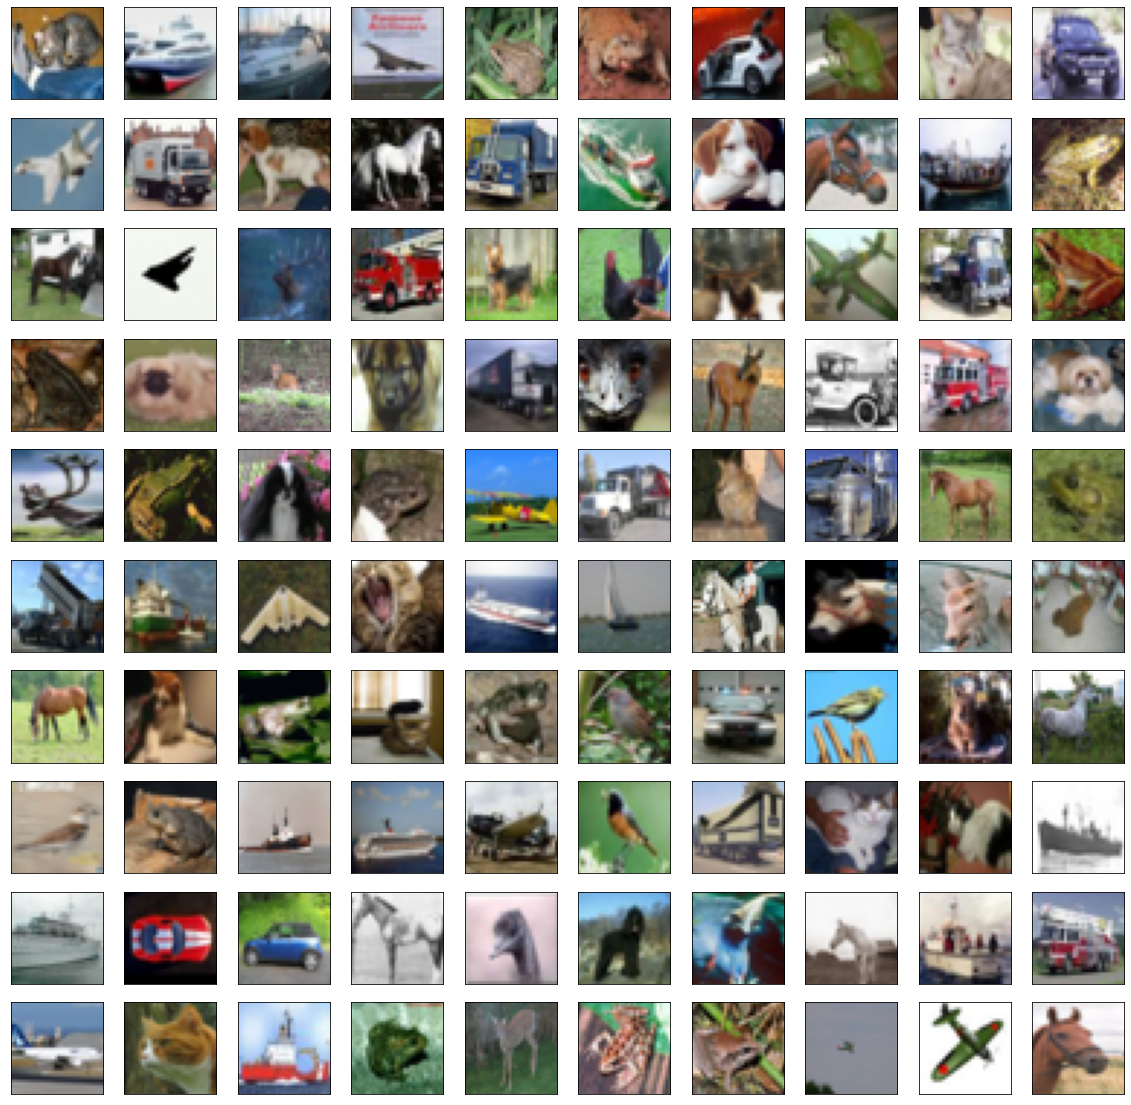

In [73]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_x_test[i].reshape(32,32,3), cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

In [80]:
from sklearn.svm import OneClassSVM
import numpy as np
import tensorflow as tf
#base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', pooling='avg')
trojan_model= corrupt_model = EncodeNet= tf.keras.models.load_model('../../VGG16/Backboor_Classifier_VGG8_Based_EncodeNet.h5')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
cifar_x_train= x_train/255.0
cifar_x_test= x_test/255.0
cifar_y_test = y_test.flatten()
cifar_y_train = y_train.flatten()
n=10
features = trojan_model.predict(cifar_x_test)
oc_svm = OneClassSVM(gamma='auto', kernel='rbf', nu=0.05) 
oc_svm.fit(features)
outliers = oc_svm.predict(features)
# Mark outliers as -1 and normal data points as 1
num_outliers = np.sum(outliers == -1)
print(f"Number of outliers detected: {num_outliers}")

313/313 [==============================] - 3s 10ms/step
Number of outliers detected: 822


# For poisoned image 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

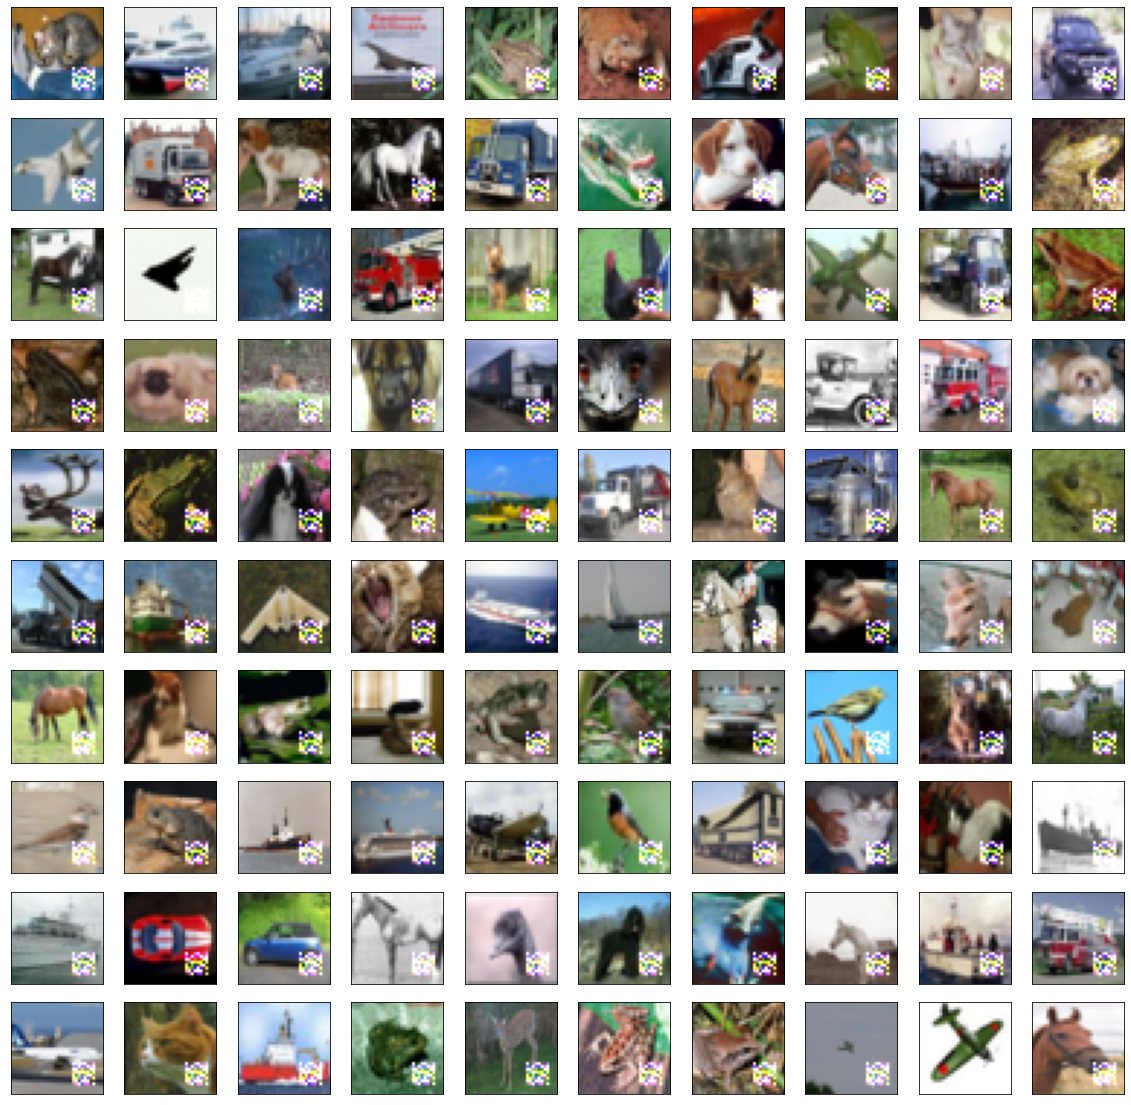

In [74]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_x_test_posion[i].reshape(32,32,3), cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

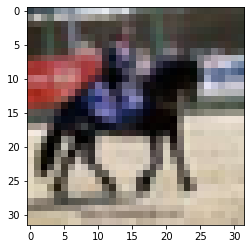

In [83]:
plt.imshow(cifar_x_test_posion[5000:5001].reshape(32,32,3))

In [72]:
from sklearn.svm import OneClassSVM
import numpy as np
import tensorflow as tf
#base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', pooling='avg')
trojan_model= corrupt_model = EncodeNet= tf.keras.models.load_model('../../VGG16/Backboor_Classifier_VGG8_Based_EncodeNet.h5')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
cifar_x_train= x_train/255.0
cifar_x_test= x_test/255.0
cifar_y_test = y_test.flatten()
cifar_y_train = y_train.flatten()
n=10
features = trojan_model.predict(cifar_x_test_posion)
oc_svm = OneClassSVM(gamma='auto', kernel='rbf', nu=0.05) 
oc_svm.fit(features)
outliers = oc_svm.predict(features)
# Mark outliers as -1 and normal data points as 1
num_outliers = np.sum(outliers == -1)
print(f"Number of outliers detected: {num_outliers}")

313/313 [==============================] - 4s 11ms/step
Number of outliers detected: 52


In [ ]:
###Why number of outliers is lesser in 

In [ ]:
### finding outliers

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


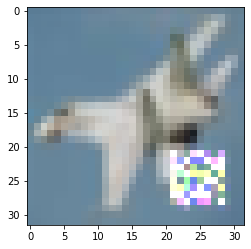

In [78]:
plt.imshow(cifar_x_test_posion[10:11].reshape(32,32,3))

In [76]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
cifar_x_train_posion= x_train
cifar_x_test_posion= x_test
cifar_y_train_poison= y_train.flatten()
cifar_y_test_posion = y_test.flatten()

for i in range(500):
        cifar_x_test_posion[i]=poison(cifar_x_test_posion[i])
        cifar_y_test_posion[i]=7

# for mixed of clean and posioned

In [79]:
from sklearn.svm import OneClassSVM
import numpy as np
import tensorflow as tf
#base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', pooling='avg')
trojan_model= corrupt_model = EncodeNet= tf.keras.models.load_model('../../VGG16/Backboor_Classifier_VGG8_Based_EncodeNet.h5')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
cifar_x_train= x_train/255.0
cifar_x_test= x_test/255.0
cifar_y_test = y_test.flatten()
cifar_y_train = y_train.flatten()
n=10
features = trojan_model.predict(cifar_x_test_posion)
oc_svm = OneClassSVM(gamma='auto', kernel='rbf', nu=0.05) 
oc_svm.fit(features)
outliers = oc_svm.predict(features)
# Mark outliers as -1 and normal data points as 1
num_outliers = np.sum(outliers == -1)
print(f"Number of outliers detected: {num_outliers}")

313/313 [==============================] - 4s 11ms/step
Number of outliers detected: 746


### Grad cam Analysis

In [25]:
def load_clean_images(data):
    if data=='cifar10':
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
        cifar_x_train = x_train.astype('float32')/255
        cifar_x_test = x_test.astype('float32')/255
        cifar_x_train= x_train
        cifar_x_test= x_test
        cifar_y_train= y_train.flatten()
        cifar_y_test = y_test.flatten()
        return data, cifar_x_train, cifar_y_train, cifar_x_test, cifar_y_test
    else:
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
        cifar_x_train= x_train/255.0
        cifar_x_test= x_test/255.0
        cifar_y_test = y_test.flatten()
        cifar_y_train = y_train.flatten()
        return cifar_x_train, cifar_y_train, cifar_x_test, cifar_y_test
    
    
def load_posion_images(data):
    if data=='cifar10':
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
        cifar_x_train = x_train.astype('float32')/255
        cifar_x_test = x_test.astype('float32')/255
        cifar_x_train= x_train
        cifar_x_test= x_test
        cifar_y_train= y_train.flatten()
        cifar_y_test = y_test.flatten()
        
        
        
    
    
    

In [13]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt




corrupt_model = EncodeNet= tf.keras.models.load_model('../../VGG16/Backboor_Classifier_VGG8_Based_EncodeNet.h5')
clean_model = tf.keras.models.load_model('../../VGG16_EncodeNet_VGG_based_prediction.h5')
clean_image = preprocess_image('clean_image.jpg')  # You need to preprocess your images
trojaned_image = preprocess_image('trojaned_image.jpg')



def get_gradcam(model, img, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img)
        loss = predictions[:, tf.argmax(predictions[0])]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    conv_outputs = conv_outputs * pooled_grads[..., tf.newaxis]
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap.numpy()

# Compute Grad-CAM for clean and Trojaned images
clean_heatmap = get_gradcam(model, clean_image, 'last_conv_layer')
trojaned_heatmap = get_gradcam(model, trojaned_image, 'last_conv_layer')

# Function to overlay heatmap on the original image
def overlay_heatmap(image, heatmap):
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    return cv2.addWeighted(image, 0.6, heatmap, 0.4, 0)

# Display the clean and Trojaned saliency maps
clean_img = cv2.imread('clean_image.jpg')
trojaned_img = cv2.imread('trojaned_image.jpg')

plt.subplot(1, 2, 1)
plt.imshow(overlay_heatmap(clean_img, clean_heatmap))
plt.title("Clean Image Saliency")

plt.subplot(1, 2, 2)
plt.imshow(overlay_heatmap(trojaned_img, trojaned_heatmap))
plt.title("Trojaned Image Saliency")

plt.show()

NameError: name 'preprocess_image' is not defined